<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 


# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


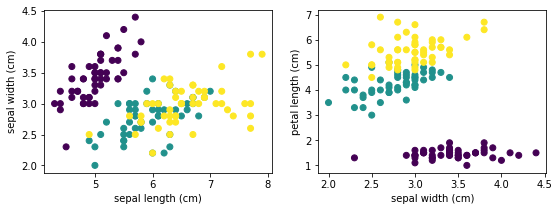

In [5]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,50 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# DBSCAN CLUSTERING - I USE

Estimated number of clusters: 2
Estimated number of noise points: 23
Homogeneity: 0.499
Completeness: 0.563
V-measure: 0.529
Adjusted Rand Index: 0.454
Adjusted Mutual Information: 0.523
Silhouette Coefficient: 0.508


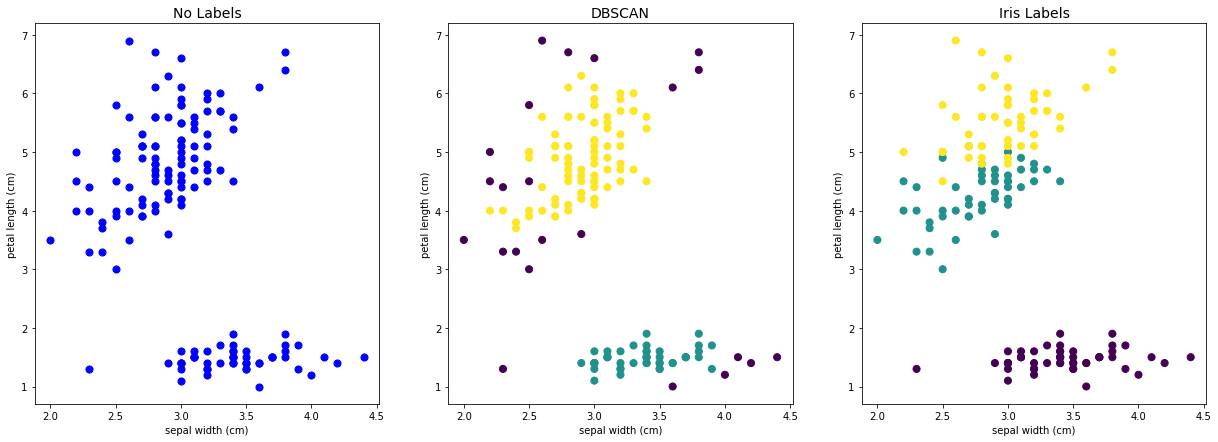

In [18]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn import metrics

#Iris Dataset
iris = datasets.load_iris()
X = iris.data

X=X[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

#DBSCAN
#min_samples primarily controls how tolerant the algorithm is towards 
#noise (on noisy and large data sets it may be desirable to increase 
#this parameter), 
#eps is crucial to choose appropriately for the data set and distance
# function and usually cannot be left at the default value. 
#It controls the local neighborhood of the points. 
db = DBSCAN(eps=0.25, min_samples=5).fit(X)

labels = ('b', db.labels_, iris.target)
title =('No Labels','DBSCAN','Iris Labels',)
fig,ax = plt.subplots(1,len(labels), figsize=(21,7))

for i, label in enumerate(labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)
  
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, db.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, db.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, db.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, db.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, db.labels_))
 

# DBSCAN CLUSTERING - II USE

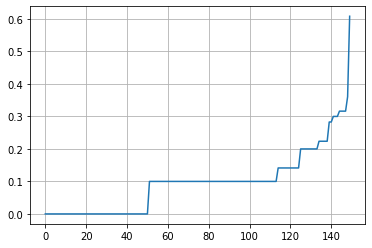

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn import datasets
from sklearn import metrics

#Iris Dataset
iris = datasets.load_iris()
X = iris.data

X=X[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

###################
# find the best EPS, which defines 
# the maximum distance between two points 

# find the max distance between n_neighbors=2
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

#plot distance 
#the best EPS is the distance where there is the maximum curve
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(b=True)
###################




Estimated number of clusters: 2
Estimated number of noise points: 6
Homogeneity: 0.569
Completeness: 0.798
V-measure: 0.664
Adjusted Rand Index: 0.546
Adjusted Mutual Information: 0.659
Silhouette Coefficient: 0.615


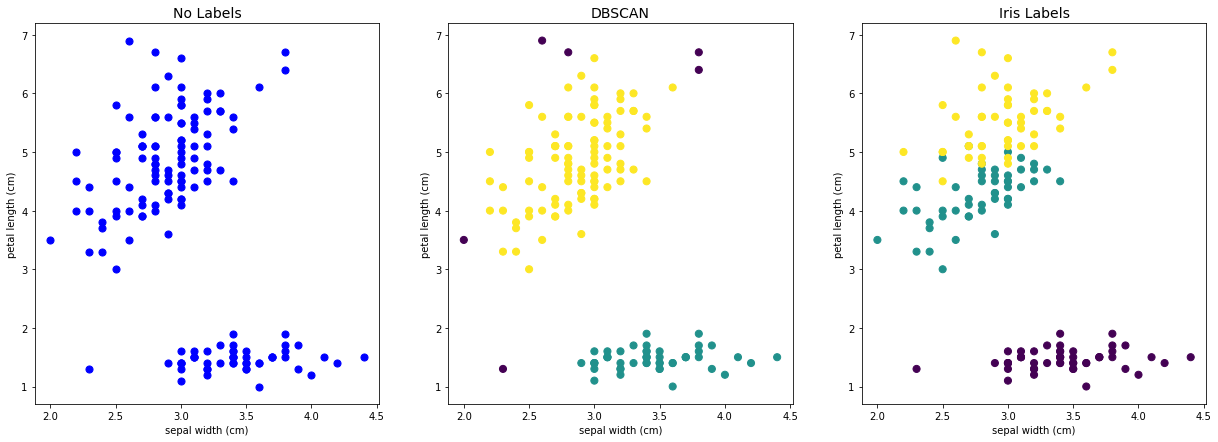

In [17]:
#DBSCAN
#min_samples primarily controls how tolerant the algorithm is towards 
#noise (on noisy and large data sets it may be desirable to increase 
#this parameter), 
#eps is crucial to choose appropriately for the data set and distance
# function and usually cannot be left at the default value. 
#It controls the local neighborhood of the points. 


db = DBSCAN(eps=0.32, min_samples=4).fit(X)


labels = ('b', db.labels_, iris.target)
title =('No Labels','DBSCAN','Iris Labels',)
fig,ax = plt.subplots(1,len(labels), figsize=(21,7))

for i, label in enumerate(labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)
  
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, db.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, db.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, db.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, db.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, db.labels_))
 




DBSCAN is not able to identify the 3 classes; so it is not the best solution for IRIS like problems, where we nìknow that classe are overlapping in the features space with the same density.